**NAME :** kalluri.rishitha


 > **PROJECT** : Hate speech detection




Steps invovled in doing this project
Data Collection
> Collect the dataset or Create the dataset

>Data Preprocessing.


  
    o	Import the Libraries.
    o	Import the dataset.
    o	Checking for Null Values.
    o	Data Visualization.
    o	Outlier Detection
    o	Splitting Dependent and Independent variables
    o    Encoding
    o	Feature Scaling.
    o	Splitting Data into Train and Test.
•	Model Building
    
    o	Import the model building Libraries
    o	Initializing the model
    o	Training and testing the model
    o	Evaluation of Model
    o	Save the Model

# 1.import the necessary libraries

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **2.import the dataset**

In [ ]:
df=pd.read_csv('twitter.csv')
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


# 3.Handling null values

In [ ]:
df.isnull()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
24778,False,False,False,False,False,False,False
24779,False,False,False,False,False,False,False
24780,False,False,False,False,False,False,False
24781,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

since we are unable to see how many null values are there. so we use sum function to get the number of null values in each column and found that all the columns are having non null values


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [ ]:
df.shape

(24783, 7)

In [ ]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


if we observe count , hate_speech we can say that from day to day how much of hate that users are delivering from day to day
class:
if class = 0 it is hate speech
if class = 1 it is offensive
if class = 2 it is neither offensive nor hatespeech
offensive language is the frequency that tells how many times offensive words are used
since priority is given for hate speech , if both offensive and hatespeech are there., it will treat class = 0|

In [ ]:
df["labels"]=df["class"].map({0:"hate speech",1:"offensive language",2: "no hate or offensive"})
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,no hate or offensive
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",no hate or offensive
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,offensive language


## 4.data visuialization

<Axes: xlabel='labels', ylabel='count'>

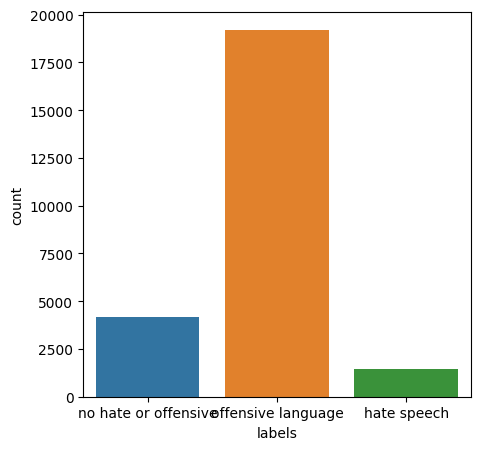

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='labels', data = df)

Text(0.5, 1.0, 'Distribution of sentiments')

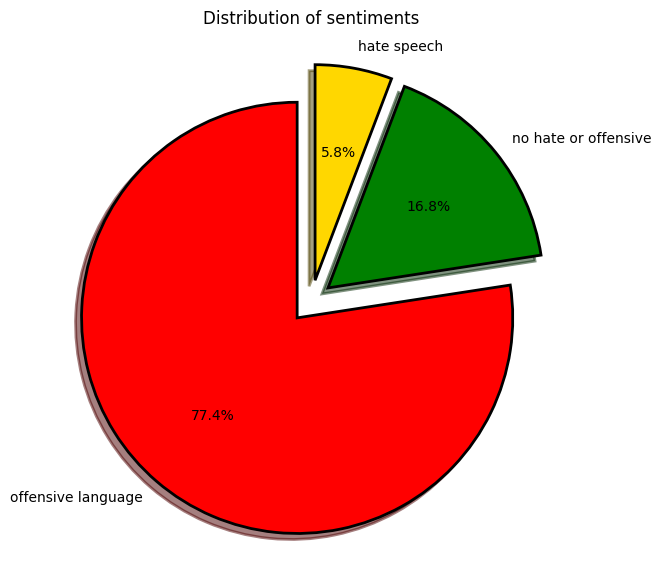

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("red","green" ,"gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['labels'].value_counts()
explode = (0.1, 0.1,0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90,wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

## 5.outliers detection

<Axes: >

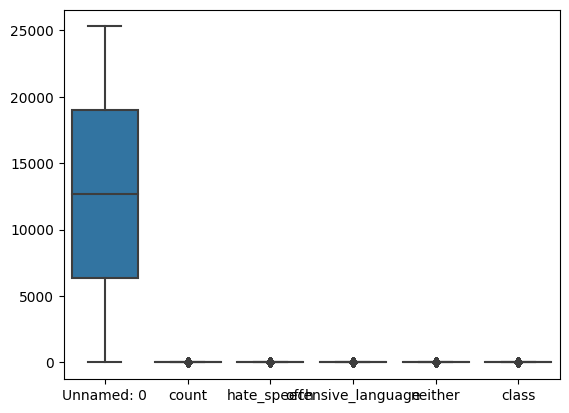

In [ ]:
sns.boxplot(df)

outliers are not identified in hate_speech,offensive_languge,class,neither but the the boxplot quartiles q1,q2,q3 are close to 0 so we noolonger need these features/attributes

In [ ]:
data=df[["tweet","labels"]]
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,no hate or offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,"you've gone and broke the wrong heart baby, an...",no hate or offensive
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,youu got wild bitches tellin you lies,offensive language


In [ ]:
corr=df.corr()
corr

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
Unnamed: 0,1.000000,0.023947,-0.054345,0.043773,-0.005187,0.024525
count,0.023947,1.000000,0.101926,0.534604,0.063326,-0.010029
hate_speech,-0.054345,0.101926,1.000000,-0.261808,-0.157599,-0.515732
offensive_language,0.043773,0.534604,-0.261808,1.000000,-0.684406,-0.410440
neither,-0.005187,0.063326,-0.157599,-0.684406,1.000000,0.800687
class,0.024525,-0.010029,-0.515732,-0.410440,0.800687,1.000000


<Axes: >

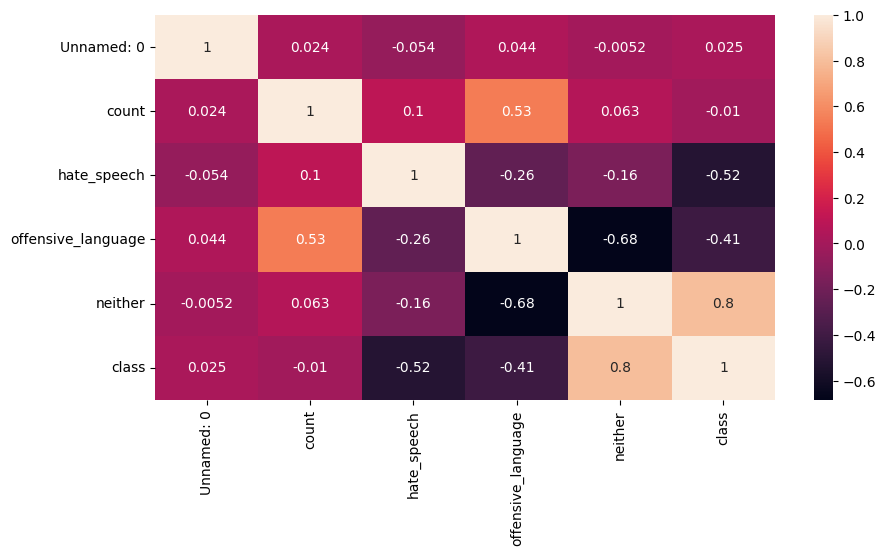

In [ ]:
plt.subplots(figsize=(10,5))#length,width
sns.heatmap(corr,annot=True,)

## 6.data preprocessing

In [ ]:
# import regular expression to get rid of special symbols and numbers in the usernames etc
import re
import nltk
import string
# we removal of stop words and Stemming the words
#for removal of punctuations import string package

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stemmer=nltk.SnowballStemmer("english")

In [ ]:
#Data Cleaning
def clean_data(text):
  text=str(text).lower()
  text=re.sub('https?://\S+|www\.S+','',text)
  text=re.sub('\[.*?\]','',text)
  text=re.sub('<.*?>+','',text)
  text=re.sub('[%s]' %re.escape(string.punctuation),'',text)
  text=re.sub('\n','',text)
  text=re.sub('\w*\d\w*','',text)
  text=[word for word in text.split(' ') if word not in stopwords]
  text=" ".join(text)
  text=[stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text


In [ ]:
data["tweet"]=data["tweet"].apply(clean_data)

In [ ]:
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,no hate or offensive
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,offensive language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,offensive language
3,rt cganderson vivabas look like tranni,offensive language
4,rt shenikarobert shit hear might true might f...,offensive language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,offensive language
24779,youv gone broke wrong heart babi drove redneck...,no hate or offensive
24780,young buck wanna eat dat nigguh like aint fuck...,offensive language
24781,youu got wild bitch tellin lie,offensive language


## 7.feature scaling and spliting training and testing data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
#feature scaling
cv=CountVectorizer()
x=cv.fit_transform(data["tweet"])

In [ ]:
y=np.array(data["labels"])

In [ ]:
#spliting data inti training an testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

## **8.Model building using decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt.predict(x_test)

In [ ]:
cf=confusion_matrix(y_test,y_pred)

In [ ]:
cf

array([[ 152,   37,  276],
       [  33, 1115,  231],
       [ 226,  220, 5889]])

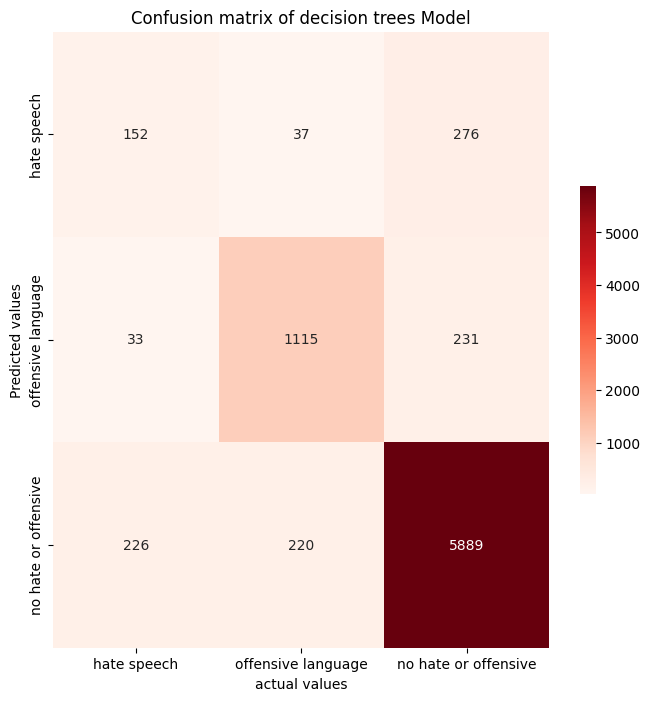

In [ ]:
plt.figure(figsize=(8,8))
axis_labels =['hate speech','offensive language','no hate or offensive']
g = sns.heatmap(data=cf,xticklabels= axis_labels,yticklabels =axis_labels,annot =True,fmt = 'g',cbar_kws={"shrink":0.5},cmap = "Reds")
p=plt.title("Confusion matrix of decision trees Model")
p = plt.xlabel('actual values')
p = plt.ylabel('Predicted values')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8749235847903166

In [ ]:
print(classification_report(y_test,y_pred))

                      precision    recall  f1-score   support

         hate speech       0.37      0.33      0.35       465
no hate or offensive       0.81      0.81      0.81      1379
  offensive language       0.92      0.93      0.93      6335

            accuracy                           0.87      8179
           macro avg       0.70      0.69      0.69      8179
        weighted avg       0.87      0.87      0.87      8179



## **9.Prediction**

In [ ]:
sample ="lets unite and kill all the people who are protesting against the government"
sample=clean_data(sample)

In [ ]:
sample

'let unit kill peopl protest govern'

In [ ]:
data1=cv.transform([sample]).toarray()
data1

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
dt.predict(data1)

array(['hate speech'], dtype=object)

# **Model building using svm model**

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred3 = clf.predict(x_test)


In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.8883726616945837


In [ ]:
cm3=confusion_matrix(y_test, y_pred3)
print(confusion_matrix(y_test, y_pred3))

[[ 143   36  286]
 [  36 1144  199]
 [ 163  193 5979]]


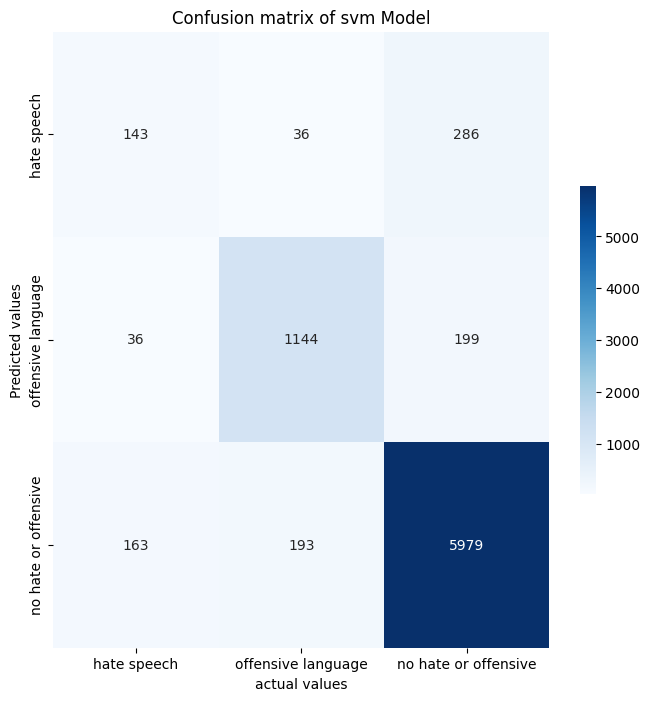

In [ ]:
plt.figure(figsize=(8,8))
axis_labels =['hate speech','offensive language','no hate or offensive']
g = sns.heatmap(data=cm3,xticklabels= axis_labels,yticklabels =axis_labels,annot =True,fmt = 'g',cbar_kws={"shrink":0.5},cmap = "Blues")
p=plt.title("Confusion matrix of svm Model")
p = plt.xlabel('actual values')
p = plt.ylabel('Predicted values')

In [ ]:
print(classification_report(y_test,y_pred3))

                      precision    recall  f1-score   support

         hate speech       0.42      0.31      0.35       465
no hate or offensive       0.83      0.83      0.83      1379
  offensive language       0.92      0.94      0.93      6335

            accuracy                           0.89      8179
           macro avg       0.73      0.69      0.71      8179
        weighted avg       0.88      0.89      0.88      8179



# Prediction

In [ ]:
sample1 ="lets unite and kill all the people who are protesting against the government"
sample1=clean_data(sample1)

In [ ]:
data1=cv.transform([sample1]).toarray()
data1

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
dt.predict(data1)

array(['hate speech'], dtype=object)

# **Model building using logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred=model.predict(x_test)
pred

array(['offensive language', 'offensive language', 'offensive language',
       ..., 'no hate or offensive', 'hate speech', 'offensive language'],
      dtype=object)

In [ ]:
y_test

array(['offensive language', 'offensive language', 'no hate or offensive',
       ..., 'offensive language', 'offensive language',
       'offensive language'], dtype=object)

In [ ]:
print(confusion_matrix(y_test, pred))
print("\n")

[[ 112   51  302]
 [   7 1180  192]
 [ 111  200 6024]]




In [ ]:
cm=confusion_matrix(y_test, pred)

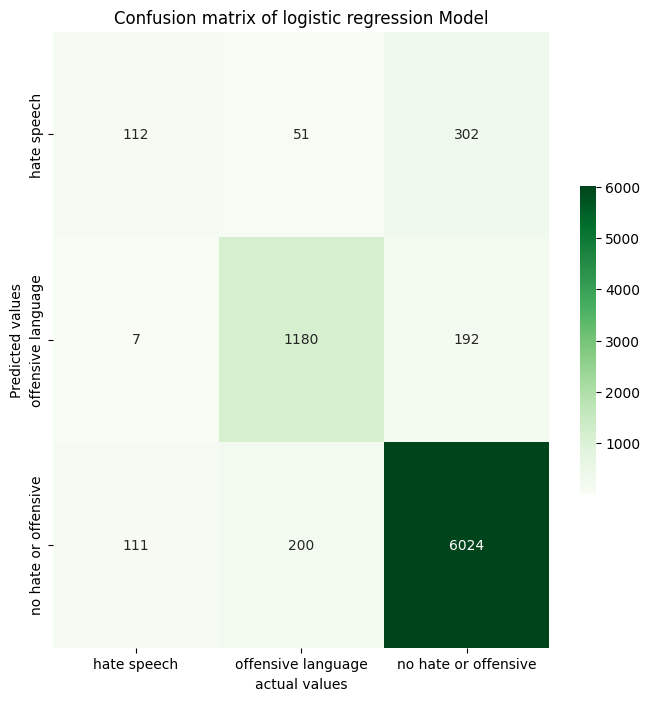

In [ ]:
plt.figure(figsize=(8,8))
axis_labels =['hate speech','offensive language','no hate or offensive']
g = sns.heatmap(data=cm,xticklabels= axis_labels,yticklabels =axis_labels,annot =True,fmt = 'g',cbar_kws={"shrink":0.5},cmap = "Greens")
p=plt.title("Confusion matrix of logistic regression Model")
p = plt.xlabel('actual values')
p = plt.ylabel('Predicted values')

In [ ]:
accuracy_score(y_test,pred)

0.8944858784692505

In [ ]:
print(classification_report(y_test, pred))

                      precision    recall  f1-score   support

         hate speech       0.49      0.24      0.32       465
no hate or offensive       0.82      0.86      0.84      1379
  offensive language       0.92      0.95      0.94      6335

            accuracy                           0.89      8179
           macro avg       0.75      0.68      0.70      8179
        weighted avg       0.88      0.89      0.89      8179



## Prediction

In [ ]:
s2 =" nice girls bad, make me get naughty. Bad yello hoe, real nice body. Down south chick, like em real thick"
s2=clean_data(s2)
s2

' nice girl bad make get naughti bad yello hoe real nice bodi south chick like em real thick'

In [ ]:
data2=cv.transform([s2]).toarray()
data2


array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
model.predict(data2)

array(['offensive language'], dtype=object)

## Using gridcv to tune hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best Cross validation score: 0.90
Best parameters:  {'C': 0.1, 'solver': 'lbfgs'}


In [ ]:
y_pred1 = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred1, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.56%


In [ ]:
print(confusion_matrix(y_test, y_pred1))
print("\n")
print(classification_report(y_test, y_pred1))

[[  54   69  342]
 [   0 1189  190]
 [  48  205 6082]]


                      precision    recall  f1-score   support

         hate speech       0.53      0.12      0.19       465
no hate or offensive       0.81      0.86      0.84      1379
  offensive language       0.92      0.96      0.94      6335

            accuracy                           0.90      8179
           macro avg       0.75      0.65      0.66      8179
        weighted avg       0.88      0.90      0.88      8179



In [ ]:
def message(message1):
    clean_data(message1)
    data2 = cv.transform([message1]).toarray()
    message_type = dt.predict(data2)
    return message_type

In [ ]:
message("I want to kill this person tonight")

array(['hate speech'], dtype=object)

In [ ]:
message("he helped me a lot. He is a good boy")

array(['no hate or offensive'], dtype=object)

After performing  suitable machine learning algorithms we conclude that
logistic Regression learning algorithms gives better accuracy than decision tree,svm models  and aslo having confusion matrix of  high TP and TN rates, low FP and FN rates.

In [ ]:
#final accuracy obtained by logistic regression after tunning hyperparameters with gridcv method
accuracy_score(y_test,y_pred1)

0.8955862574886906

In [ ]:
#final confusion matrix
print(confusion_matrix(y_test, y_pred1))
print("\n")

[[  54   69  342]
 [   0 1189  190]
 [  48  205 6082]]




In [ ]:
#clasification report
print(classification_report(y_test, y_pred1))

                      precision    recall  f1-score   support

         hate speech       0.53      0.12      0.19       465
no hate or offensive       0.81      0.86      0.84      1379
  offensive language       0.92      0.96      0.94      6335

            accuracy                           0.90      8179
           macro avg       0.75      0.65      0.66      8179
        weighted avg       0.88      0.90      0.88      8179

